!jt -t chesterish
# !jt -r

In [1]:
from genetic_algorithm import *
from numpy.random import default_rng
from tqdm import tqdm
from itertools import product #combinations_with_replacement
%matplotlib notebook

import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation

import copy
from collections import Counter
import pandas as pd

In [2]:
## hexadecimal generator

nr_of_input = 2
nr_of_actions = 5
nr_of_inner = 3
nr_of_genes = 8
nr_individuals = 800

individuals = generate_initial_genomes_for_population(nr_individuals, nr_of_genes, nr_of_input, nr_of_actions, nr_of_inner)

## world size
ws = 40
world_size_x = ws
world_size_y = ws

##TODo if world_size_x != world_size_y fit then limit coord_full_list 

coord_full_list = np.array(list(product(range(ws), repeat=2)))
ind = np.random.choice(len(coord_full_list), nr_individuals, replace=False)
pos = coord_full_list[ind]

## initial brain and position generator

result = calculate_individual_output_weights(individuals)

## assign position and remove brains without output

indiv_to_del = []
for indiv in result:
    if result[indiv]['out']:
        result[indiv]['position'] = [list(pos[indiv])]
    else:
        indiv_to_del.append(indiv)

for key in indiv_to_del:
    del result[key] 

In [3]:
nr_of_errors = 0

k = 20
n = 0
pbar = tqdm(total=k, initial=n)

while k>n: 
    pbar.update(1)
    for indiv in result:
        x, y = result[indiv]['position'][-1][0], result[indiv]['position'][-1][1]
        if n<1:
            calculate_position(result, indiv, x, y, world_size_x, world_size_y)    
        elif n >= 1:
            apply_input(result, indiv)
            calculate_position(result, indiv, x, y, world_size_x, world_size_y)
    last_pos_list = {obj:result[obj]['position'][-1] for obj in result}
#     print(last_pos_list)
#     print()
    prevent_overlap_movement(last_pos_list, result)

    n += 1
pbar.close()


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [04:10<00:00, 12.55s/it]


In [4]:
df = pd.DataFrame()
for key in result:
    df[key] = pd.Series(result[key]['position']).apply(lambda x: '.'.join((str(x[0]),str(x[1]))))

print(Counter(df.iloc[-1,:]).most_common(10))

# df

[('37.15', 1), ('13.8', 1), ('6.29', 1), ('40.1', 1), ('8.0', 1), ('11.26', 1), ('15.8', 1), ('24.29', 1), ('25.30', 1), ('1.7', 1)]


generate dictionary of coords 

In [5]:
coords = [{'x':[], 'y':[]} for key in range(len(result[indiv]['position']))]
for indiv in result:
    for pos_nr, pos in enumerate(result[indiv]['position']):
        coords[pos_nr]['x'].append(pos[0])
        coords[pos_nr]['y'].append(pos[1])

visualisation

<IPython.core.display.Javascript object>


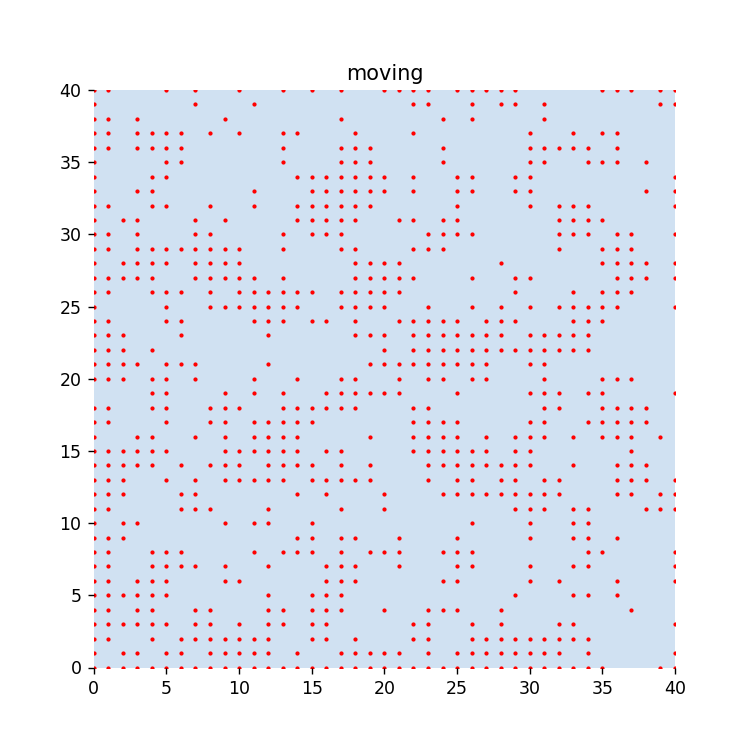

In [11]:
def update(i):
    ax.clear()
    ax.set_facecolor(plt.cm.Blues(.2))

    ax.set_xlim([0,world_size_x])
    ax.set_ylim([0,world_size_y])
    ax.set_title('moving')
    ax.scatter(x=coords[i]['x'],y=coords[i]['y'], c='red', s=2, marker='o')
    [spine.set_visible(False) for spine in ax.spines.values()] #remove chart 
    
fig, ax = plt.subplots(figsize=(6,6))
anime = FuncAnimation(
    fig = fig,
    func = update,
    frames = len(coords),
    interval = 10, repeat=False
)


### mutation

hexa to binary

In [17]:
list_of_genes = {indiv:[i.hex_id for i in individuals[indiv]] for indiv in individuals}
list_of_genes

{0: ['e81ad5c3',
  '63e72fee',
  '5447f965',
  '92df9b35',
  '1fa636fa',
  'f7f53cd2',
  'a0bdc429',
  'f25e51ed'],
 1: ['2661a696',
  '746f3356',
  'b5453f15',
  '0a4a165c',
  'd9fb5063',
  '28dcfcd4',
  '6fb0ada8',
  '17d376ab'],
 2: ['bda470d0',
  'c3c2b0ff',
  'f6f7f6fb',
  '2b7f42d7',
  '9252ddf6',
  '38675c07',
  '0837e0cd',
  'f007876a'],
 3: ['873512d8',
  'e75e72f8',
  'd58c823b',
  'a2faac0f',
  'fc40a712',
  '7867f035',
  'a313f0c0',
  '6fa4b16f'],
 4: ['5cbad02e',
  '33c38214',
  '784d252e',
  '5e3483f7',
  '7c97044d',
  '210c46fd',
  'fc06c878',
  '2429dab7'],
 5: ['6a8efb39',
  'd792b3ec',
  'c07e9cc0',
  '8aae0f16',
  'b2948ed1',
  'd84b6407',
  'd6b2d03e',
  '84fe75b6'],
 6: ['065c89d8',
  'e5276359',
  'c9af7c2d',
  '0ad344f9',
  '19c61075',
  '784872c2',
  '5256b6fa',
  '3b33a282'],
 7: ['cb44ff37',
  '380b23f8',
  '2c651cc9',
  '4ff6c318',
  '40201ac3',
  'ac24a8dd',
  'c03e28cc',
  'f3ef4c8e'],
 8: ['a5bf3767',
  '06c08236',
  'ce6e0db8',
  '281c2e80',
  'd988e3c8',

In [10]:
result[0]

{'out': {'out3': 0.031, 'out2': 0.571, 'out1': 0.88},
 'brain': {'mid2mid2': ['mid2', 'mid2', 2.680299099649016],
  'in1out3': ['in1', 'out3', -1.7181748817335571],
  'in0mid2': ['in0', 'mid2', 3.79392644590264],
  'mid0out0': ['mid0', 'out0', 0.8502975736303983],
  'mid2out2': ['mid2', 'out2', -1.9008087898672363],
  'mid2out1': ['mid2', 'out1', 2.130199908438883],
  'mid0mid1': ['mid0', 'mid1', -2.56041507706394]},
 'in': ['in1', 'in0'],
 'position': [[36, 15],
  [36, 15],
  [36, 15],
  [36, 15],
  [36, 15],
  [36, 15],
  [36, 15],
  [36, 15],
  [36, 15],
  [36, 15],
  [36, 15],
  [37, 15],
  [37, 15],
  [37, 15],
  [37, 15],
  [37, 15],
  [37, 15],
  [37, 15],
  [37, 15],
  [37, 15],
  [37, 15]],
 'brain_after_pruning': [('mid2', 'mid2', 2.680299099649016),
  ('in1', 'out3', -1.7181748817335571),
  ('in0', 'mid2', 3.79392644590264),
  ('mid2', 'out2', -1.9008087898672363),
  ('mid2', 'out1', 2.130199908438883)]}

In [7]:
binary = bin(int(individuals[0][0].hex_id, 16))[2:]
if len(binary) < 32:
    factor = 32 - len(binary)
    binary = '0' * factor + binary
binary

'11101000000110101101010111000011'